In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training set
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


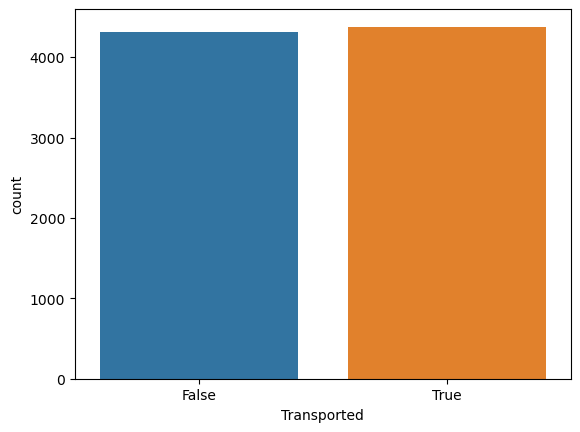

c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


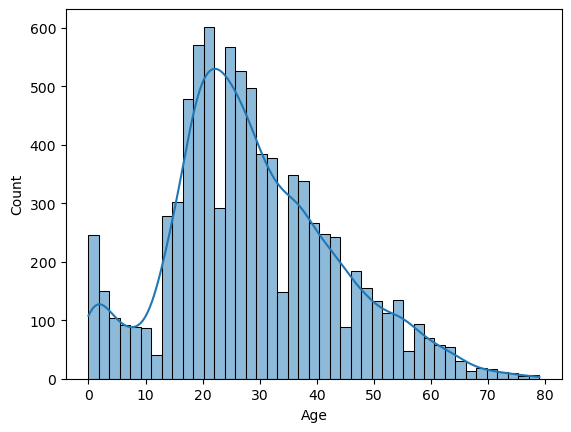

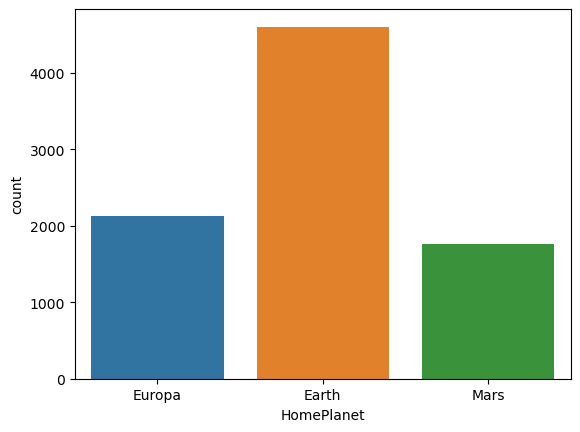

In [3]:
# Checking for missing values
print(train_df.isnull().sum())

# Plotting the distribution of the target variable
sns.countplot(x='Transported', data=train_df)
plt.show()

# Plotting the distribution of some features
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.show()

sns.countplot(x='HomePlanet', data=train_df)
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Fill missing values for numerical columns
    num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df[num_cols] = df[num_cols].fillna(0)
    
    # Fill missing values for categorical columns
    cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
    present_cat_cols = [col for col in cat_cols if col in df.columns]
    df[present_cat_cols] = df[present_cat_cols].fillna('Unknown')
    
    # Convert boolean columns to string type
    if 'CryoSleep' in df.columns:
        df['CryoSleep'] = df['CryoSleep'].astype(str)
    if 'VIP' in df.columns:
        df['VIP'] = df['VIP'].astype(str)
    
    # Extract Deck and Side from Cabin if Cabin is present
    if 'Cabin' in df.columns:
        df['Deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if x != 'Unknown' else 'Unknown')
        df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[-1] if x != 'Unknown' else 'Unknown')
        df.drop(columns=['Cabin'], inplace=True)
    
    # Encode categorical features
    le = LabelEncoder()
    for col in present_cat_cols + ['Deck', 'Side']:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    return df

# Assuming train_df and test_df are already defined
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Drop irrelevant columns
train_df.drop(columns=['PassengerId', 'Name'], inplace=True)
test_df.drop(columns=['PassengerId', 'Name'], inplace=True)


In [7]:
# Split the data
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 0.7734


In [10]:
# Make predictions on the test set
test_preds = model.predict(test_df)

# Load the sample submission file
submission_df = pd.read_csv('sample_submission.csv')

# Prepare the submission file
# Convert the predictions to the required format if necessary (e.g., rounding or thresholding for classification)
submission_df['Transported'] = (test_preds > 0.5).astype(bool)  # Assuming a binary classification task with 0.5 threshold
submission_df.to_csv('submission.csv', index=False)


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
Pa

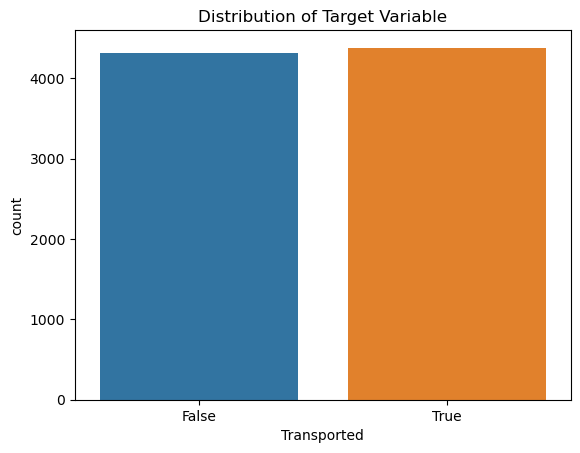

c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


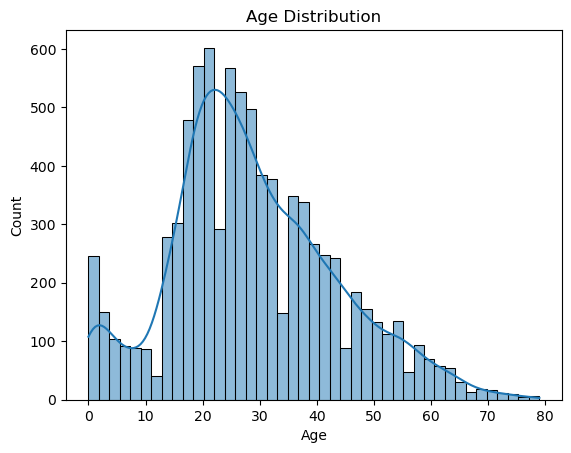

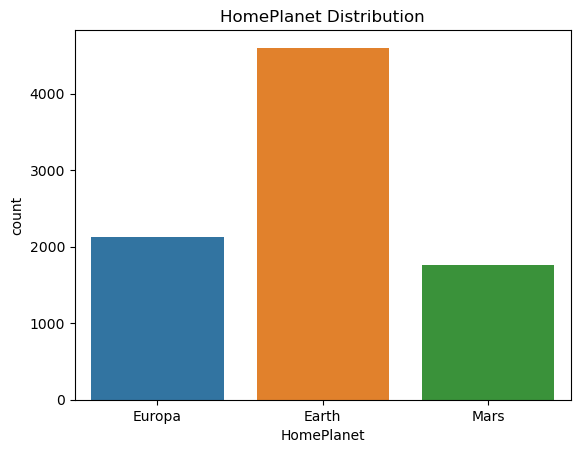

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Validation Accuracy with Hyperparameter Tuning: 0.7901


c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:158: UserWarning: [21:04:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy with Voting Classifier: 0.7947
Submission file created: 'submission.csv'


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training set
print(train_df.head())

# Checking for missing values
print(train_df.isnull().sum())

# Plotting the distribution of the target variable
sns.countplot(x='Transported', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()

# Plotting the distribution of some features
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='HomePlanet', data=train_df)
plt.title('HomePlanet Distribution')
plt.show()

# Define the preprocessing function
def preprocess_data(df):
    # Convert Name to string type to avoid TypeError
    df['Name'] = df['Name'].astype(str)
    
    # Fill missing values for numerical columns
    num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df[num_cols] = df[num_cols].fillna(0)
    
    # Fill missing values for categorical columns
    cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
    present_cat_cols = [col for col in cat_cols if col in df.columns]
    df[present_cat_cols] = df[present_cat_cols].fillna('Unknown')
    
    # Convert boolean columns to string type
    if 'CryoSleep' in df.columns:
        df['CryoSleep'] = df['CryoSleep'].astype(str)
    if 'VIP' in df.columns:
        df['VIP'] = df['VIP'].astype(str)
    
    # Extract Deck and Side from Cabin if Cabin is present
    if 'Cabin' in df.columns:
        df['Deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if x != 'Unknown' else 'Unknown')
        df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[-1] if x != 'Unknown' else 'Unknown')
        df.drop(columns=['Cabin'], inplace=True)
    
    # Extract Title from Name
    if 'Name' in df.columns:
        df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip() if ',' in x else 'Unknown')
        df.drop(columns=['Name'], inplace=True)
    
    # Create new features
    df['Total_Spending'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
    
    # Convert Age_Group to numeric codes
    df['Age_Group'] = df['Age_Group'].astype('category').cat.codes
    
    # Encode categorical features
    le = LabelEncoder()
    for col in present_cat_cols + ['Deck', 'Side', 'Title']:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    return df

# Preprocess the data
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Drop irrelevant columns
train_df.drop(columns=['PassengerId'], inplace=True)
test_df.drop(columns=['PassengerId'], inplace=True)

# Split the data
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_rf.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy with Hyperparameter Tuning: {accuracy:.4f}')

# Define the models for stacking
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', best_rf), ('xgb', xgb)], voting='soft')

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = voting_clf.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy with Voting Classifier: {accuracy:.4f}')

# Make predictions on the test set with the VotingClassifier
test_preds = voting_clf.predict(test_df)

# Load the sample submission file
submission_df = pd.read_csv('sample_submission.csv')

# Prepare the submission file
submission_df['Transported'] = test_preds
submission_df.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")
